In [12]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

monday = pd.read_csv("./data/monday.csv", sep=";")
tuesday = pd.read_csv("./data/tuesday.csv", sep=";")
wednesday = pd.read_csv("./data/wednesday.csv", sep=";")
thursday = pd.read_csv("./data/thursday.csv", sep=";")
friday = pd.read_csv("./data/friday.csv", sep=";")

week = [monday, tuesday, wednesday, thursday, friday]

In [14]:
monday.head(20)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [7]:
for day in week:
    # set timestamp as datetime and as index
    day.timestamp = pd.to_datetime(day.timestamp)
    day.set_index("timestamp", inplace=True)

    # Removing the customers that did not check out. 
    all_customers = set(day.customer_no.values)
    checked_out_customers = set(day[day["location"] == "checkout"].customer_no.values)
    non_checked_out_customers = list(all_customers.difference(checked_out_customers))
    day = day[~day.loc[:, "customer_no"].isin(non_checked_out_customers)]
    print(
        f"""The customers that have not checked out on {day.index[0].day_name()} are {non_checked_out_customers}"""
    )

for day in week:
    # add the customer count
    day["nr_loc"] = day.groupby("customer_no").cumcount()
    add_customer = day.loc[:, "nr_loc"].transform(lambda x: 1 if x == 0 else 0)
    delete_customer = day.loc[:, "location"].transform(
        lambda x: -1 if x == "checkout" else 0
    )
    day["add"] = add_customer + delete_customer
    day["cust_total"] = day.loc[:, "add"].cumsum()

The customers that have not checked out on Monday are [1440, 1441, 1443, 1445, 1446, 1447, 1430, 1433, 1437, 1439]
The customers that have not checked out on Tuesday are [1411, 1422]
The customers that have not checked out on Wednesday are [1520, 1527, 1528, 1529, 1530]
The customers that have not checked out on Thursday are [1532, 1533, 1527]
The customers that have not checked out on Friday are [1505, 1506, 1509, 1510, 1494, 1496, 1500, 1503]


In [8]:
monday.head()

,customer_no,location,nr_loc,add,cust_total
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,0,1,1
2019-09-02 07:03:00,2,dairy,0,1,2
2019-09-02 07:04:00,3,dairy,0,1,3
2019-09-02 07:04:00,4,dairy,0,1,4
2019-09-02 07:04:00,5,spices,0,1,5


In [3]:
monday.info()
monday.head()
monday.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4884 entries, 2019-09-02 07:03:00 to 2019-09-02 21:50:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  4884 non-null   int64 
 1   location     4884 non-null   object
 2   nr_loc       4884 non-null   int64 
 3   add          4884 non-null   int64 
 4   cust_total   4884 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 228.9+ KB


,customer_no,location,nr_loc,add,cust_total
timestamp,,,,,
2019-09-02 21:49:00,1442,checkout,1,-1,8
2019-09-02 21:49:00,1444,checkout,1,-1,7
2019-09-02 21:49:00,1445,dairy,0,1,8
2019-09-02 21:50:00,1446,dairy,0,1,9
2019-09-02 21:50:00,1447,fruit,0,1,10


In [4]:
# Add the day
monday["day"] = "monday"
tuesday["day"] = "tuesday"
wednesday["day"] = "wednesday"
thursday["day"] = "thursday"
friday["day"] = "friday"

In [5]:
friday.head()

,customer_no,location,nr_loc,add,cust_total,day
timestamp,,,,,,
2019-09-06 07:00:00,1,dairy,0,1,1,friday
2019-09-06 07:00:00,2,drinks,0,1,2,friday
2019-09-06 07:00:00,3,fruit,0,1,3,friday
2019-09-06 07:01:00,2,checkout,1,-1,2,friday
2019-09-06 07:01:00,4,drinks,0,1,3,friday


In [6]:
total = monday.append(tuesday.append(wednesday.append(thursday.append(friday))))
total.shape
total.head()

,customer_no,location,nr_loc,add,cust_total,day
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,0,1,1,monday
2019-09-02 07:03:00,2,dairy,0,1,2,monday
2019-09-02 07:04:00,3,dairy,0,1,3,monday
2019-09-02 07:04:00,4,dairy,0,1,4,monday
2019-09-02 07:04:00,5,spices,0,1,5,monday


In [7]:
### Use resample to make it easier to calculate the nr. of customers at each point
### in time
total = total.groupby(["customer_no", "day"]).resample("min").ffill()
total.index = total.index.droplevel([0, 1])
total.head()

,customer_no,location,nr_loc,add,cust_total,day
timestamp,,,,,,
2019-09-06 07:00:00,1,dairy,0,1,1,friday
2019-09-06 07:01:00,1,dairy,0,1,1,friday
2019-09-06 07:02:00,1,dairy,0,1,1,friday
2019-09-06 07:03:00,1,dairy,0,1,1,friday
2019-09-06 07:04:00,1,spices,1,0,6,friday


In [8]:
### Calculate the total number of customers in each section
total.groupby("location")["customer_no"].count()

location
checkout     7417
dairy       17774
drinks       9726
fruit       12708
spices       6278
Name: customer_no, dtype: int64

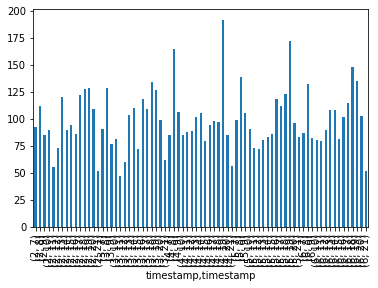

<Figure size 2880x1440 with 0 Axes>

In [10]:
### Display the number of customers at checkout over time
total.groupby(by=[total.index.day, total.index.hour, "location"])[
    "customer_no"
].count().unstack(2)["checkout"].plot(kind="bar")
plt.figure(figsize=(40, 20))
plt.show()

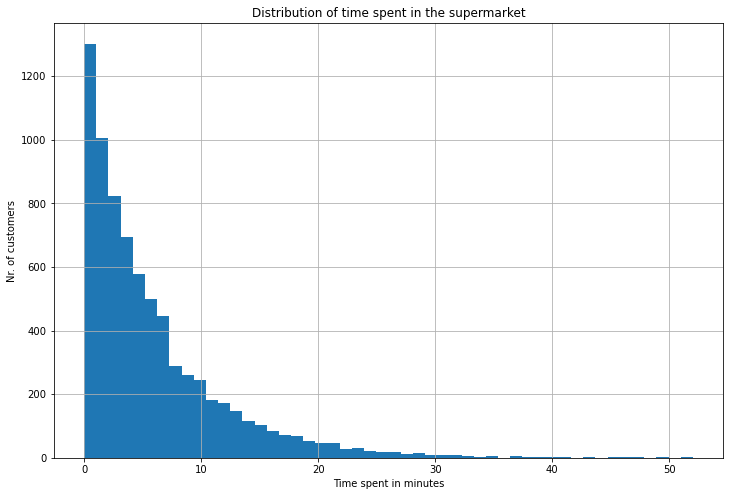

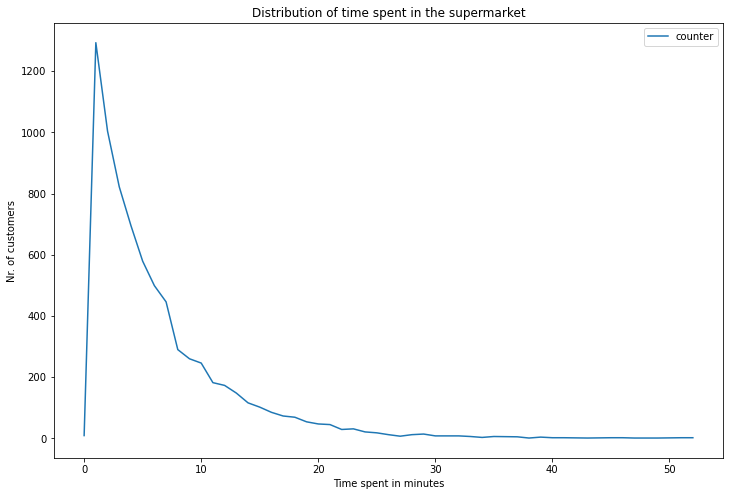

(48, 3)

In [12]:
### Calculate the time each customer spent in the market
time_ = total.reset_index()
time_in_market = (
    time_.groupby(["customer_no", "day"])[["timestamp"]].last()
    - time_.groupby(["customer_no", "day"])[["timestamp"]].first()
)
time_in_market["counter"] = 1
time_in_market.head()
time_in_market["time_spent"] = time_in_market.timestamp.dt.seconds / 60
time_in_market.hist(column="time_spent", figsize=(12, 8), bins=50)
plt.xlabel("Time spent in minutes")
plt.ylabel("Nr. of customers")
plt.title("Distribution of time spent in the supermarket")
plt.show()


time_count = time_in_market.groupby("timestamp").count()
time_count.shape
time_count.reset_index(inplace=True)
time_count["time_spent"] = time_count.timestamp.dt.seconds / 60
time_count.head()


time_count.plot(
    x="time_spent", y="counter", figsize=(12, 8)
)  # .bar(x='timestamp', height='count')
plt.xlabel("Time spent in minutes")
plt.ylabel("Nr. of customers")
plt.title("Distribution of time spent in the supermarket")
plt.show()

# time_count.time_spent.value_counts()
time_count.shape

<AxesSubplot:xlabel='timestamp'>

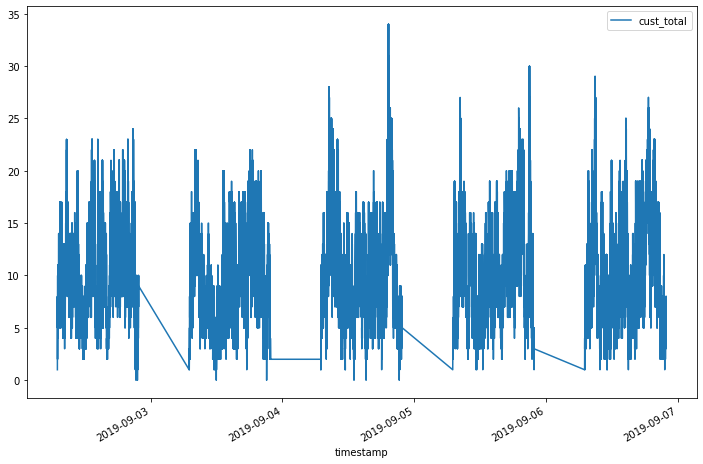

In [13]:
### Calculate the total number of customers present in the supermarket over time.
# make sure each customer only enters the supermarket max once a day
total[total.location == "checkout"].groupby(["customer_no", "day"]).count().max()
len(set(monday.customer_no.values).difference())
len(set(monday[monday.location == "checkout"].customer_no.values))

# plot number of totatl customers
total.reset_index().plot(x="timestamp", y="cust_total", figsize=(12, 8))



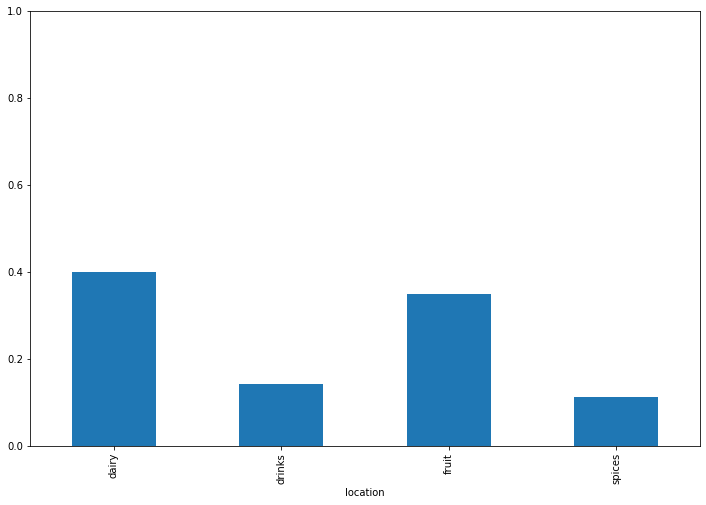

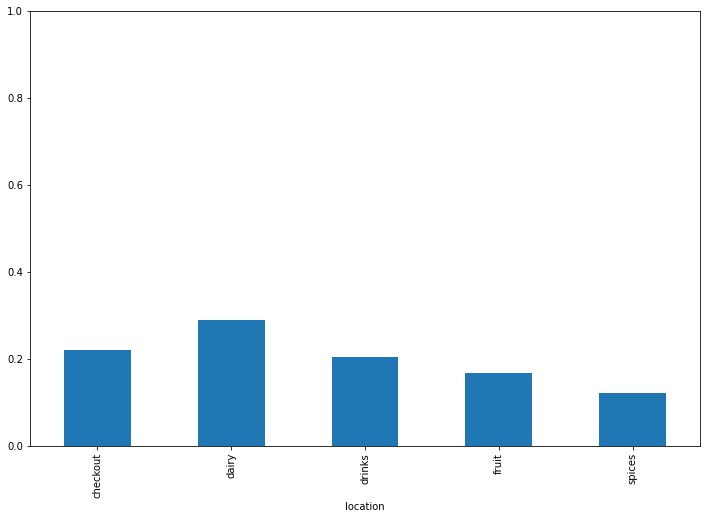

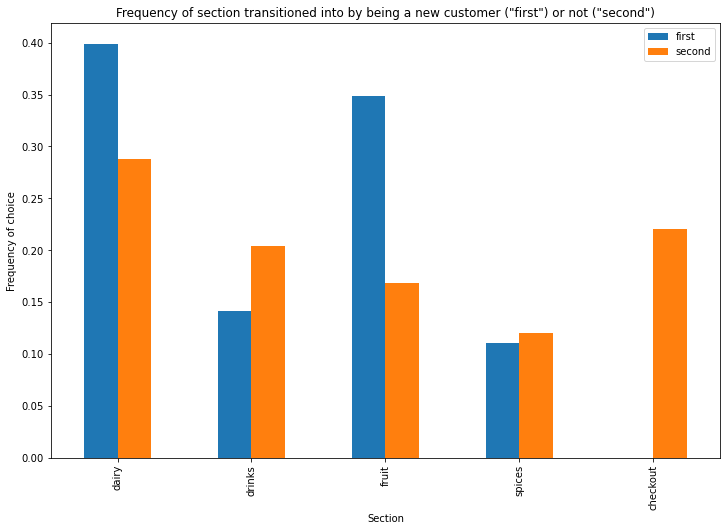

In [15]:
#### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).
total_firsts = total[total["add"] == 1].shape[0]
freq_firsts = (
    total[total["add"] == 1].groupby("location").count()["customer_no"] / total_firsts
)
freq_firsts.plot.bar(figsize=(12, 8))
plt.axis(ymin=0, ymax=1)
plt.show()


total_seconds = total[total["add"] != 1].shape[0]
freq_seconds = (
    total[total["add"] != 1].groupby("location").count()["customer_no"] / total_seconds
)
# freq_firsts.plot.bar(figsize=(12, 8), color='r')
freq_seconds.plot.bar(figsize=(12, 8))
plt.axis(ymin=0, ymax=1)
plt.show()


pd.DataFrame(
    [freq_firsts, freq_seconds], index=["first", "second"]
).transpose().plot.bar(figsize=(12, 8))
plt.title(
    'Frequency of section transitioned into by being a new customer ("first") or not ("second")'
)
plt.xlabel("Section")
plt.ylabel("Frequency of choice")
plt.show()